[IPython Notebook](legacy_overcontact.ipynb) |  [Python Script](legacy_overcontact.py)

Comparing Overcontacts in PHOEBE 2.0 vs PHOEBE Legacy
============================

**NOTE**: PHOEBE 1.0 legacy is an alternate backend and is not installed with PHOEBE 2.0.  In order to run this backend, you'll need to have [PHOEBE 1.0](https://phoebe-project.org/1.0) installed.

Setup
-----------------------------

As always, let's do imports and initialize a logger and a new bundle.  See [Building a System](../tutorials/building_a_system.html) for more details.

In [1]:
%matplotlib inline

In [2]:
import phoebe
from phoebe import u
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe.logger(clevel='INFO')

b = phoebe.Bundle.default_binary(overcontact=True)
#b['q'] = 0.7

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)
/usr/local/lib/python2.7/dist-packages/astropy/units/quantity.py:732: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  return super(Quantity, self).__eq__(other)


Adding Datasets and Compute Options
--------------------

In [3]:
#b.add_dataset('LC', time=np.linspace(0,3,101), dataset='lc01')
#b.add_dataset('RV', time=np.linspace(0,3,101), dataset='rv01')
b.add_dataset('MESH', time=[0], dataset='mesh01')

<ParameterSet: 1 parameters>

Let's add compute options for phoebe using both the new (marching) method for creating meshes as well as the WD method which imitates the format of the mesh used within legacy.

In [4]:
b.add_compute(compute='phoebe2marching', mesh_method='marching')

<ParameterSet: 20 parameters | qualifiers: dynamics_method, gridsize, gr, rv_method, mesh_offset, integrator, atm, enabled, ltte, rv_grav, stepsize, etv_method, maxpoints, delta, etv_tol, store_mesh, distortion_method, eclipse_alg, mesh_method, lc_method>

In [5]:
b.add_compute(compute='phoebe2wd', mesh_method='wd', eclipse_alg='graham')

<ParameterSet: 20 parameters | qualifiers: dynamics_method, gridsize, gr, rv_method, mesh_offset, integrator, atm, enabled, ltte, rv_grav, stepsize, etv_method, maxpoints, delta, etv_tol, store_mesh, distortion_method, eclipse_alg, mesh_method, lc_method>

Now we add compute options for the 'legacy' backend.

In [6]:
b.add_compute('legacy', compute='phoebe1')

<ParameterSet: 11 parameters | qualifiers: atm, refl_num, cindex, store_mesh, enabled, heating, rv_method, gridsize, morphology, mult_refl, ie>

The 'blackbody' atmospheres from phoebe1 are comperable to the 'extern_planckint' atmospheres in phoebe.

In [7]:
b.set_value_all('atm@phoebe2wd', 'extern_planckint')
b.set_value_all('atm@phoebe2marching', 'extern_planckint')
b.set_value_all('atm@phoebe1', 'blackbody')

Let's make sure both 'phoebe1' and 'phoebe2wd' use the same value for gridsize

In [8]:
b.set_value_all('gridsize', 30)

Let's also disable other special effect such as heating, gravity, and light-time effects.

In [9]:
# b.set_value_all('ld_coeffs', [0.,0.])
# TODO: remove this once tested to work correctly with limbdarkening

In [10]:
b.set_value_all('heating', False)
#b.set_value_all('refl', False)
# TODO: remove these?

In [11]:
b.set_value_all('rv_grav', False)
# TODO: phoebe1???
# TODO: remove these?

In [12]:
b.set_value_all('ltte', False)

Finally, let's compute all of our models

In [13]:
b.run_compute(compute='phoebe2marching', model='phoebe2marchingmodel')

<ParameterSet: 25 parameters | qualifiers: teff, pot, logg, vx, vy, vz, nx, ny, nz, time, r_proj, volume, rpole, visibility, areas, tareas, vertices, mu, r, cosbeta, normals, y, x, z, visible_centroids>

In [14]:
#b.run_compute(compute='phoebe2wd', model='phoebe2wdmodel')

In [15]:
#b.run_compute(compute='phoebe1', model='phoebe1model')

Plotting
-------------------------

### Meshes

/usr/local/lib/python2.7/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


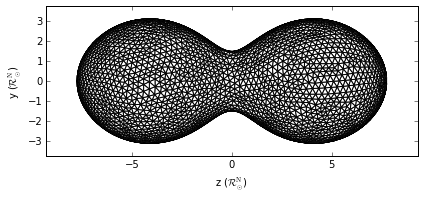

In [16]:
axs, artists = b['mesh01@phoebe2marchingmodel'].plot(x='z')

In [17]:
#axs, artists = b['mesh01@phoebe2wdmodel'].plot(x='z')

In [18]:
#axs, artists = b['mesh01@phoebe1model'].plot(x='z')

### Light Curve

In [19]:
#axs, artists = b['lc01@phoebe2marchingmodel'].plot(color='g')
#axs, artists = b['lc01@phoebe2wdmodel'].plot(color='b')
#axs, artists = b['lc01@phoebe1model'].plot(color='r')
#leg = plt.legend(loc=4)

Now let's plot the residuals between these two models

In [20]:
#artist, = plt.plot(b.get_value('flux@lc01@phoebe2marchingmodel') - b.get_value('flux@lc01@phoebe1model'), 'g-')
#artist, = plt.plot(b.get_value('flux@lc01@phoebe2wdmodel') - b.get_value('flux@lc01@phoebe1model'), 'b-')
#artist = plt.axhline(0.0, linestyle='dashed', color='k')

### RVs

In [21]:
#axs, artists = b['rvnum@phoebe2marchingmodel'].plot(color='g')
#axs, artists = b['rvnum@phoebe2wdmodel'].plot(color='b')
#axs, artists = b['rvnum@phoebe1model'].plot(color='r')

In [22]:
#artist, = plt.plot(b.get_value('rv@rvnum@primary@phoebe2marchingmodel', ) - b.get_value('rv@rvnum@primary@phoebe1model'), color='g', ls=':')
#artist, = plt.plot(b.get_value('rv@rvnum@secondary@phoebe2marchingmodel') - b.get_value('rv@rvnum@secondary@phoebe1model'), color='g', ls='-.')
#
#artist, = plt.plot(b.get_value('rv@rvnum@primary@phoebe2wdmodel', ) - b.get_value('rv@rvnum@primary@phoebe1model'), color='b', ls=':')
#artist, = plt.plot(b.get_value('rv@rvnum@secondary@phoebe2wdmodel') - b.get_value('rv@rvnum@secondary@phoebe1model'), color='b', ls='-.')
#
#artist = plt.axhline(0.0, linestyle='dashed', color='k')
#ylim = plt.ylim(-1e-2, 1e-2)